In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp

In [3]:
# Load up and pick an mjd
sm = sb.SkyModelPre(preload=False)
mjd = 60364.0208333333#59760. #60364.0208333333

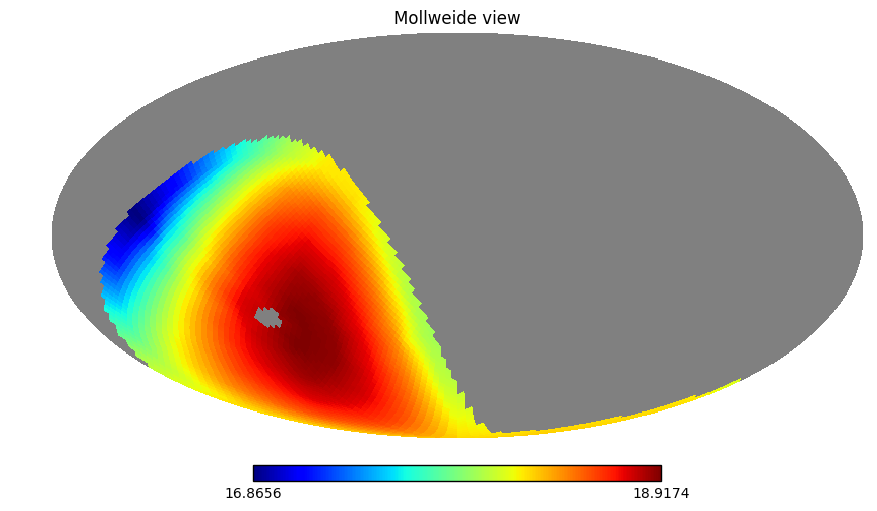

In [4]:
# Calculate full sky in the usual way
mags = sm.returnMags(mjd)
hp.mollview(mags['r'])

In [5]:
# Extrapolate to some higher airmass healpixels
airmasses = sm.returnAirmass(mjd)
good = np.where((airmasses > 2.8) & (airmasses < 4.))
outliers = sm.returnMags(mjd, indx=good, extrapolate=True)

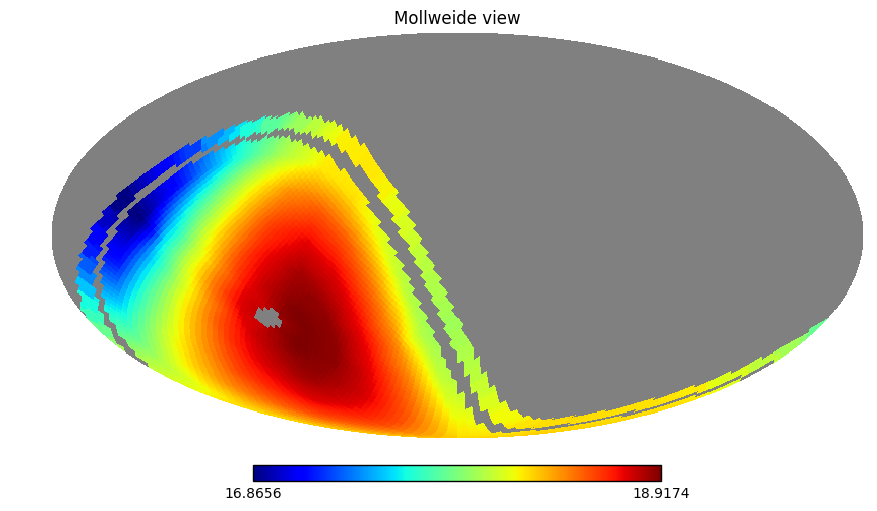

In [7]:
# Combine the previous map and extrapolated values
extend_mags = mags['r'].copy()
extend_mags[good] = outliers['r']
hp.mollview(extend_mags)